<a href="https://colab.research.google.com/github/MrCalmTam/AI_ANN/blob/main/AI_CNN_1404.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [28]:
x_train = x_train.reshape(60000,28,28,1)   # 1 la so kenh 

In [29]:
x_test = x_train.reshape(60000,28,28,1)   # 1 la so kenh 


In [30]:
x_train.shape

(60000, 28, 28, 1)

In [31]:
import matplotlib.pyplot as plt
x_train =x_train.astype('float32')/255
from keras.utils import to_categorical # chuyen thanh 1 bit thanh 10 bit 
y_train = to_categorical(y_train,10)

In [32]:
y_train.shape

(60000, 10)

In [33]:

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
batch_size=64
epochs=20
classes=10


In [34]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='linear', input_shape=(28,28,1), padding='same')) #32 lan tich chap
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same')) #64 lan tich chap
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same')) #128 lan tich chap
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [35]:
from keras.backend import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train = model.fit(x_train, y_train,epochs=20, batch_size=64,verbose=1)
model.save('model1.hs')

Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1400 - accuracy: 0.9560
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0415 - accuracy: 0.9869
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0284 - accuracy: 0.9909
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0204 - accuracy: 0.9933
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0162 - accuracy: 0.9949
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0148 - accuracy: 0.9951
Epoch 7/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0103 - accuracy: 0.9963
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0098 - accuracy: 0.9969
Epoch 9/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0091 - accuracy: 0.9969
Epoch 10/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0070 - accuracy: 0.9977

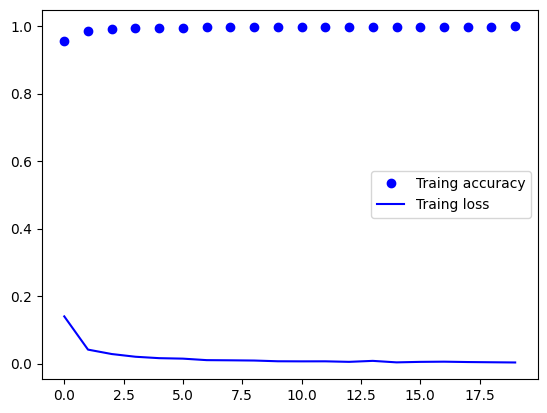

In [36]:

accuracy = train.history['accuracy']
epochs=range(len(accuracy))
loss=train.history['loss']
plt.plot(epochs , accuracy,'bo',label='Traing accuracy')
plt.plot(epochs ,loss,'b',label='Traing loss')
plt.legend()
plt.show()